In [1]:
import pandas as pd
import numpy as np

# **2.1.1 Calcul des descripteurs**

In [2]:
# Charger le fichier Excel
file_path = 'WangSignatures.xlsx'

# Charger chaque feuille de descripteurs
jcd = pd.read_excel(file_path, sheet_name='WangSignaturesJCD', header=None)
phog = pd.read_excel(file_path, sheet_name='WangSignaturesPHOG', header=None)
cedd = pd.read_excel(file_path, sheet_name='WangSignaturesCEDD', header=None)
fcth = pd.read_excel(file_path, sheet_name='WangSignaturesFCTH', header=None)
fuzzy_color_histogram = pd.read_excel(file_path, sheet_name='WangSignaturesFuzzyColorHistogr', header=None)

# Afficher quelques informations sur les descripteurs
print(f'JCD shape: {jcd.shape}')
print(f'PHOG shape: {phog.shape}')
print(f'CEDD shape: {cedd.shape}')
print(f'FCTH shape: {fcth.shape}')
print(f'FuzzyColorHistogram shape: {fuzzy_color_histogram.shape}')

JCD shape: (1000, 169)
PHOG shape: (1000, 256)
CEDD shape: (1000, 145)
FCTH shape: (1000, 193)
FuzzyColorHistogram shape: (1000, 126)


In [3]:
# Afficher les noms des colonnes pour chaque descripteur
print(f'Colonnes JCD: {jcd.columns}')
print(f'Colonnes PHOG: {phog.columns}')
print(f'Colonnes CEDD: {cedd.columns}')
print(f'Colonnes FCTH: {fcth.columns}')
print(f'Colonnes FuzzyColorHistogram: {fuzzy_color_histogram.columns}')

Colonnes JCD: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168],
      dtype='int64', length=169)
Colonnes PHOG: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255],
      dtype='int64', length=256)
Colonnes CEDD: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
      dtype='int64', length=145)
Colonnes FCTH: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192],
      dtype='int64', length=193)
Colonnes FuzzyColorHistogram: Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
      dtype='int64', length=126)


In [4]:
# Afficher la première colonne
print(f'JCD nom image: \n {jcd[0]}')
print(f'PHOG nom image: \n {phog[0]}')
print(f'CEDD nom image: \n {cedd[0]}')
print(f'FCTH nom image: \n {fcth[0]}')
print(f'FuzzyColorHistogram nom image: \n {fuzzy_color_histogram[0]}')

JCD nom image: 
 0        0.jpg
1        1.jpg
2       10.jpg
3      100.jpg
4      101.jpg
        ...   
995    995.jpg
996    996.jpg
997    997.jpg
998    998.jpg
999    999.jpg
Name: 0, Length: 1000, dtype: object
PHOG nom image: 
 0        0.jpg
1        1.jpg
2       10.jpg
3      100.jpg
4      101.jpg
        ...   
995    995.jpg
996    996.jpg
997    997.jpg
998    998.jpg
999    999.jpg
Name: 0, Length: 1000, dtype: object
CEDD nom image: 
 0        0.jpg
1        1.jpg
2       10.jpg
3      100.jpg
4      101.jpg
        ...   
995    995.jpg
996    996.jpg
997    997.jpg
998    998.jpg
999    999.jpg
Name: 0, Length: 1000, dtype: object
FCTH nom image: 
 0        0.jpg
1        1.jpg
2       10.jpg
3      100.jpg
4      101.jpg
        ...   
995    995.jpg
996    996.jpg
997    997.jpg
998    998.jpg
999    999.jpg
Name: 0, Length: 1000, dtype: object
FuzzyColorHistogram nom image: 
 0        0.jpg
1        1.jpg
2       10.jpg
3      100.jpg
4      101.jpg
        ...  

In [5]:
# Fonction pour trier les DataFrames par le numéro dans le nom de fichier
def sort_by_image_number(df):
    # Extraire la partie numérique du nom de l'image (avant '.jpg')
    df['image_num'] = df[0].str.extract('(\d+)').astype(int)  # extraire la partie numérique
    # Trier par la colonne 'image_num'
    df = df.sort_values('image_num')
    print(df.head(15))
    # Supprimer la colonne contenant les noms de fichiers et la colonne temporaire 'image_num'
    df = df.drop(columns=[0, 'image_num'])
    return df

# Appliquer le tri à chaque DataFrame
jcd_sorted = sort_by_image_number(jcd)
phog_sorted = sort_by_image_number(phog)
cedd_sorted = sort_by_image_number(cedd)
fcth_sorted = sort_by_image_number(fcth)
fuzzy_color_histogram_sorted = sort_by_image_number(fuzzy_color_histogram)

          0    1    2    3    4    5    6    7    8    9  ...  160  161  162  \
0     0.jpg  0.5  2.0  2.0  0.5  1.0  1.0  2.0  1.5  3.5  ...  0.0  0.0  1.0   
1     1.jpg  0.5  3.0  3.5  1.0  0.5  2.5  3.0  2.5  4.0  ...  0.0  0.0  0.0   
112   2.jpg  1.0  1.5  3.0  0.5  0.0  2.0  1.5  0.5  3.0  ...  0.0  0.0  0.0   
223   3.jpg  3.0  3.5  3.5  2.5  0.5  2.5  2.0  1.0  3.0  ...  0.0  0.0  0.0   
334   4.jpg  3.0  2.5  3.5  0.0  0.0  0.5  0.0  0.0  1.0  ...  0.0  0.0  0.0   
445   5.jpg  1.5  1.0  1.5  1.0  1.0  1.5  2.0  1.5  2.5  ...  0.0  0.0  0.0   
556   6.jpg  0.5  1.5  3.5  1.0  0.5  3.0  1.5  1.0  3.0  ...  0.0  0.0  0.0   
667   7.jpg  2.5  2.5  3.5  1.5  1.5  3.0  0.5  1.0  1.5  ...  0.0  0.0  0.0   
778   8.jpg  1.5  1.5  2.5  1.0  1.0  2.5  1.0  1.0  2.5  ...  0.0  0.0  0.0   
889   9.jpg  1.5  4.0  4.0  1.0  1.0  1.5  1.0  0.5  3.0  ...  0.0  0.0  0.0   
2    10.jpg  3.5  3.0  1.0  0.5  0.5  1.5  2.5  2.5  2.5  ...  0.0  0.0  0.0   
13   11.jpg  2.0  1.5  2.0  0.5  0.5  0.

In [6]:
# Fusionner les DataFrames triés en une seule matrice de descripteurs
descriptors = pd.concat([jcd_sorted, phog_sorted, cedd_sorted, fcth_sorted, fuzzy_color_histogram_sorted], axis=1)

# Afficher la taille finale de la matrice des descripteurs
print(f'Total descriptors shape: {descriptors.shape}')

Total descriptors shape: (1000, 884)


In [7]:
# Créer les labels en fonction de l'ordre des images
# 100 images par classe (Jungle, Plage, Monuments, Bus, etc.)
labels = []
classes = ['Jungle', 'Plage', 'Monuments', 'Bus', 'Dinosaures', 'Éléphants', 'Fleurs', 'Chevaux', 'Montagne', 'Plats']

for i, class_name in enumerate(classes):
    labels.extend([class_name] * 100)  # 100 images par classe

labels = np.array(labels)

# Vérifier les dimensions des descripteurs et des labels
print(f'Labels shape: {labels.shape}')

Labels shape: (1000,)


# **2.1.2 Mise en place d’un système de discrimination basée structure Full-Connected**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def train_and_evaluate_mlp(descriptors, labels, test_size=0.3, epochs=50, batch_size=32):
    """
    Entraîne un modèle Perceptron Multi-Couches sur les descripteurs fournis et évalue ses performances.

    :param descriptors: np.ndarray, les caractéristiques (features) du dataset
    :param labels: np.ndarray, les étiquettes associées aux caractéristiques
    :param test_size: float, la proportion des données à utiliser pour l'ensemble de test
    :param epochs: int, le nombre d'époques pour l'entraînement
    :param batch_size: int, la taille des batchs pour l'entraînement
    :return: None, affiche la précision et la matrice de confusion
    """

    # Encodage des labels en one-hot
    unique_classes = np.unique(labels)
    label_map = {label: idx for idx, label in enumerate(unique_classes)}
    y = np.array([label_map[label] for label in labels])
    y_one_hot = to_categorical(y)
    
    print(f"Shape des labels one-hot encodés: {y_one_hot.shape}")

    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        np.array(descriptors), y_one_hot, test_size=test_size, random_state=1, stratify=y_one_hot
    )

    # Créer le modèle Perceptron Multi-couches
    model = Sequential([
        Dense(16, activation='relu', input_shape=[X_train.shape[1]]),
        Dense(8, activation='relu'),
        Dense(len(unique_classes), activation='softmax')
    ])

    # Compiler le modèle
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entraîner le modèle
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3, verbose=1)

    # Évaluer le modèle sur l'ensemble de test
    score = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {score[1] * 100:.2f}%")

    # Tracer la courbe d'entraînement
    plt.plot(history.history['accuracy'], label='Entraînement')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title("Précision de l'entraînement")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.show()

    # Prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Matrice de confusion
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
    plt.xlabel("Prédictions")
    plt.ylabel("Véritables classes")
    plt.title("Matrice de confusion")
    plt.show()

Shape des labels one-hot encodés: (1000, 10)


c:\Users\mathe\Save_OneDrive_CNAM\CNAM_3\Projet_1_Rouché_Sagard\projet_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1667 - loss: 2.2369 - val_accuracy: 0.2417 - val_loss: 2.1400
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2692 - loss: 2.0619 - val_accuracy: 0.2607 - val_loss: 2.0242
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3325 - loss: 1.8844 - val_accuracy: 0.3175 - val_loss: 1.9164
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3773 - loss: 1.7812 - val_accuracy: 0.3365 - val_loss: 1.8200
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4153 - loss: 1.6740 - val_accuracy: 0.3697 - val_loss: 1.7352
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4722 - loss: 1.5408 - val_accuracy: 0.4123 - val_loss: 1.6654
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4891 - loss: 1.5253 - val_accuracy: 0.4313 - val_loss: 1.5859
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5313 - loss: 1.4090 - val_accuracy: 0.4408 - val_loss

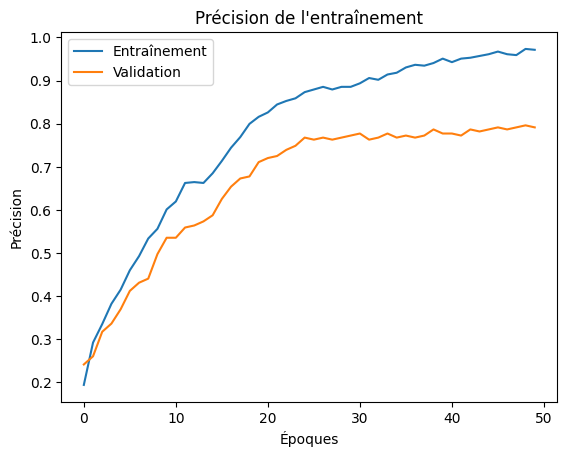

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


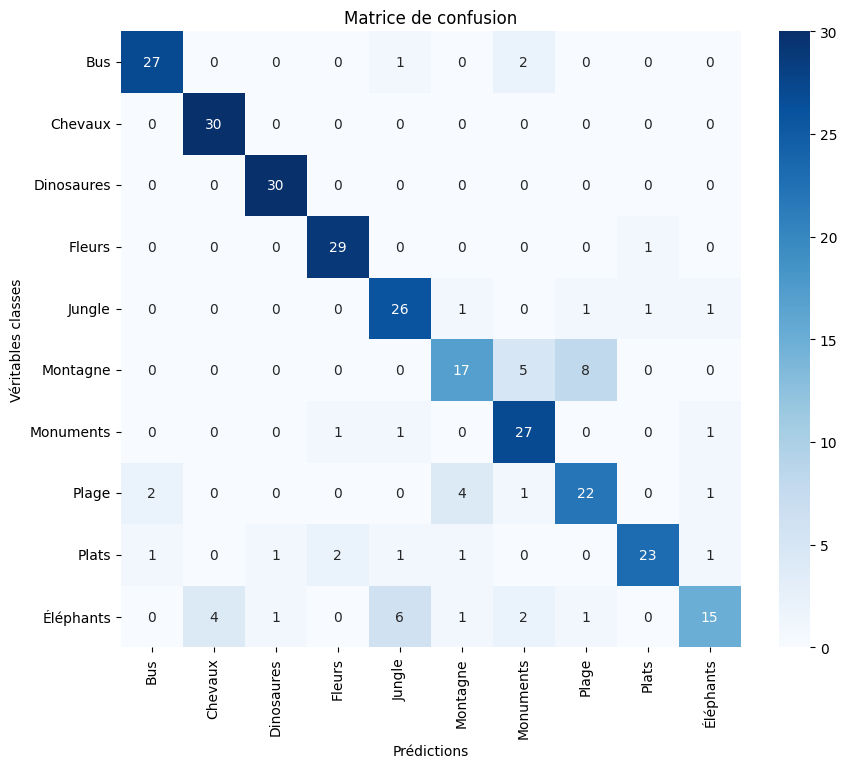

Shape des labels one-hot encodés: (1000, 10)
Epoch 1/50


c:\Users\mathe\Save_OneDrive_CNAM\CNAM_3\Projet_1_Rouché_Sagard\projet_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0830 - loss: 9.2284 - val_accuracy: 0.1043 - val_loss: 3.7139
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0961 - loss: 3.3339 - val_accuracy: 0.1422 - val_loss: 2.5781
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1667 - loss: 2.5615 - val_accuracy: 0.1659 - val_loss: 2.3820
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1745 - loss: 2.3391 - val_accuracy: 0.1706 - val_loss: 2.2888
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1766 - loss: 2.2282 - val_accuracy: 0.1611 - val_loss: 2.2709
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2046 - loss: 2.2059 - val_accuracy: 0.1848 - val_loss: 2.2558
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1944 - loss: 2.1926 - val_accuracy: 0.1564 - val_loss: 2.2466
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2021 - loss: 2.2120 - val_accuracy: 0.1754 - val_loss: 2.2391
Ep

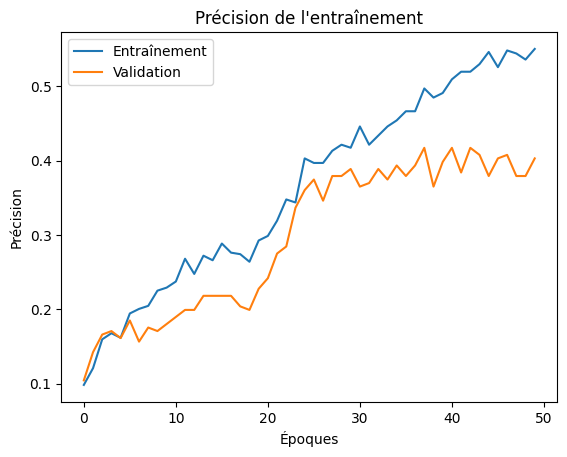

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


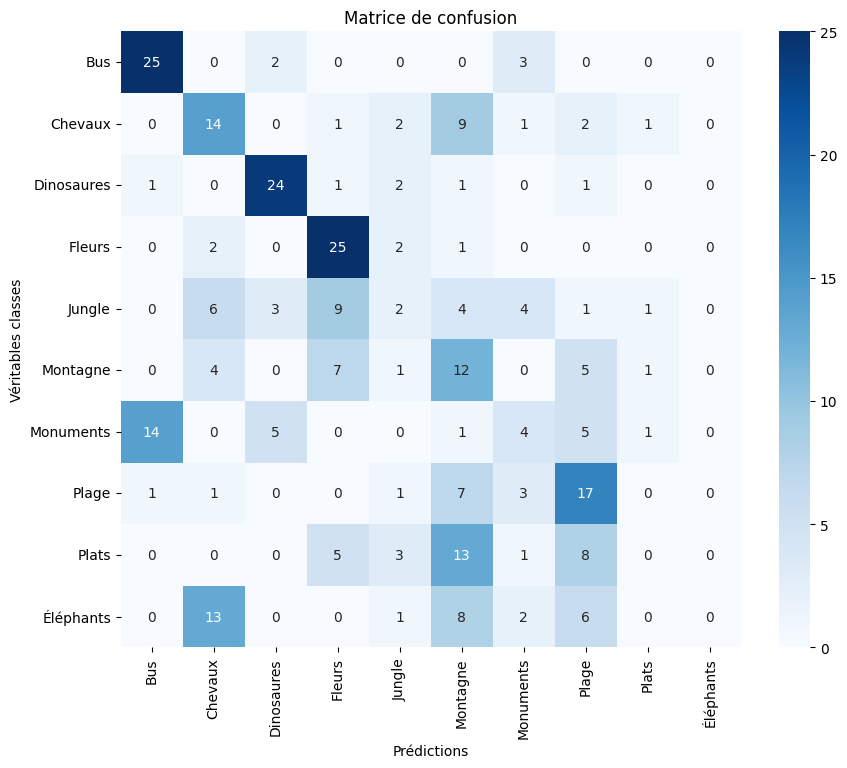

Shape des labels one-hot encodés: (1000, 10)
Epoch 1/50


c:\Users\mathe\Save_OneDrive_CNAM\CNAM_3\Projet_1_Rouché_Sagard\projet_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1551 - loss: 2.2514 - val_accuracy: 0.1280 - val_loss: 2.2199
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2035 - loss: 2.1889 - val_accuracy: 0.2607 - val_loss: 2.1484
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3241 - loss: 2.0616 - val_accuracy: 0.2938 - val_loss: 2.0673
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3724 - loss: 1.9761 - val_accuracy: 0.3033 - val_loss: 1.9941
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4121 - loss: 1.8412 - val_accuracy: 0.3270 - val_loss: 1.9271
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3942 - loss: 1.8003 - val_accuracy: 0.3318 - val_loss: 1.8532
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3712 - loss: 1.7636 - val_accuracy: 0.3555 - val_loss: 1.7966
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4034 - loss: 1.7085 - val_accuracy: 0.3839 - val_loss: 1.7132
Ep

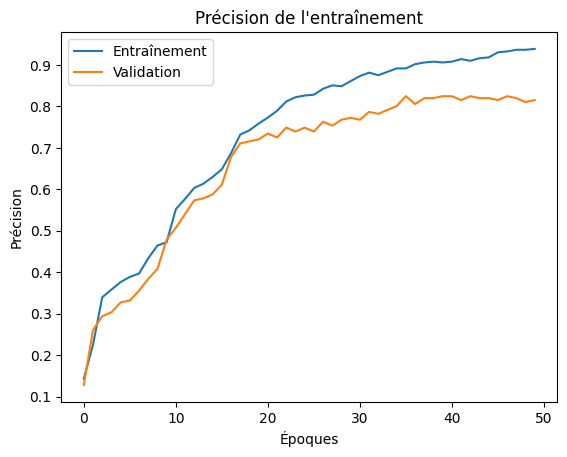

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


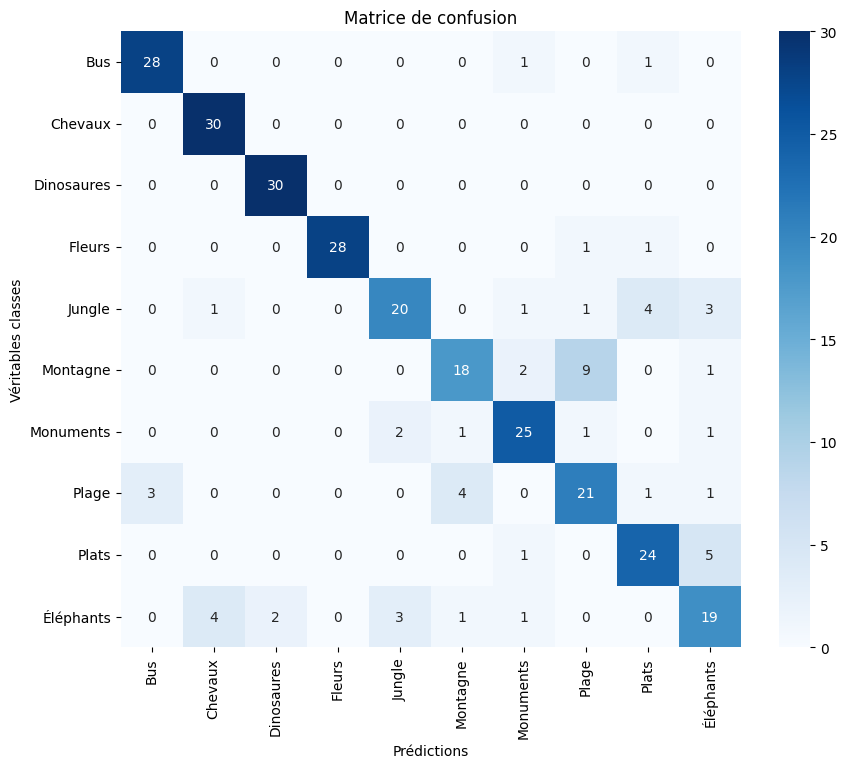

Shape des labels one-hot encodés: (1000, 10)
Epoch 1/50


c:\Users\mathe\Save_OneDrive_CNAM\CNAM_3\Projet_1_Rouché_Sagard\projet_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0742 - loss: 2.3785 - val_accuracy: 0.0853 - val_loss: 2.3363
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1348 - loss: 2.2578 - val_accuracy: 0.1137 - val_loss: 2.2628
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1587 - loss: 2.1859 - val_accuracy: 0.1517 - val_loss: 2.2147
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2083 - loss: 2.1281 - val_accuracy: 0.1801 - val_loss: 2.1674
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2501 - loss: 2.0645 - val_accuracy: 0.2180 - val_loss: 2.1249
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2719 - loss: 1.9886 - val_accuracy: 0.2370 - val_loss: 2.0817
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2720 - loss: 1.9267 - val_accuracy: 0.2512 - val_loss: 2.0313
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2921 - loss: 1.9111 - val_accuracy: 0.2607 - val_loss: 1.9735
Ep

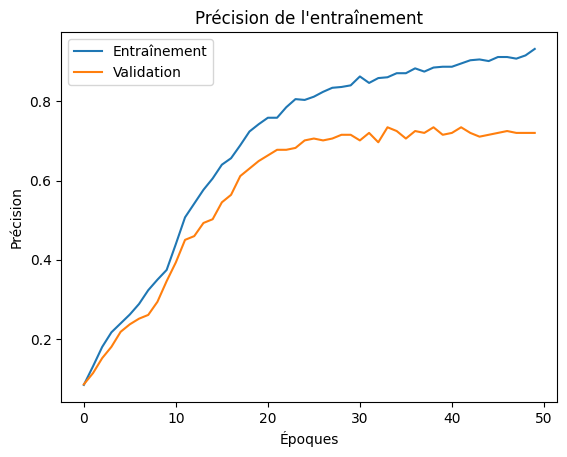

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


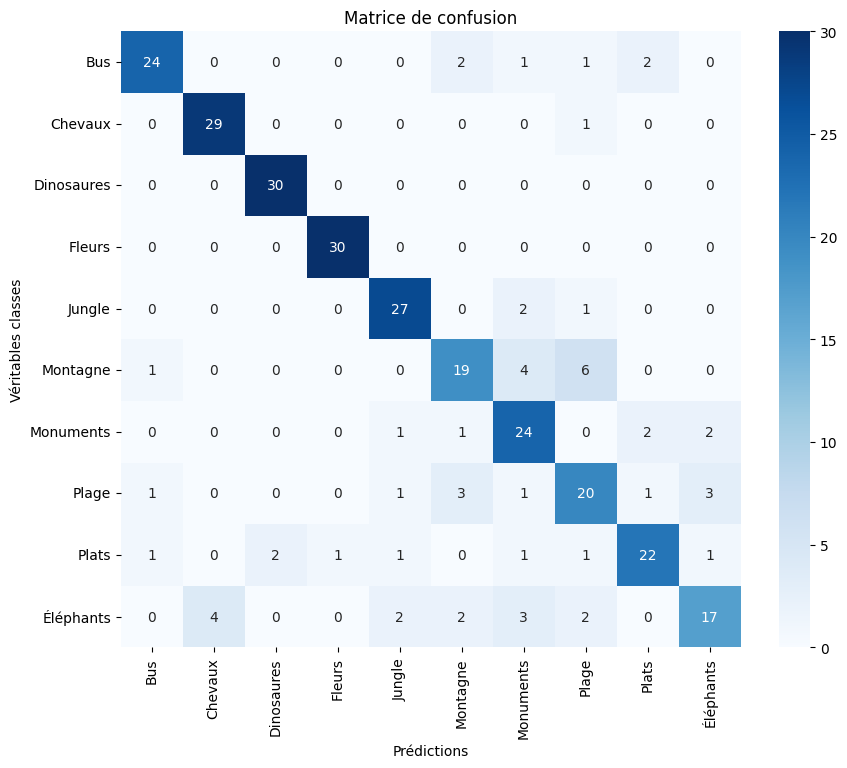

Shape des labels one-hot encodés: (1000, 10)
Epoch 1/50


c:\Users\mathe\Save_OneDrive_CNAM\CNAM_3\Projet_1_Rouché_Sagard\projet_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1404 - loss: 31.6727 - val_accuracy: 0.2891 - val_loss: 7.7058
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1973 - loss: 7.3054 - val_accuracy: 0.1564 - val_loss: 4.0509
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1770 - loss: 3.3524 - val_accuracy: 0.1659 - val_loss: 2.9224
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1905 - loss: 2.3560 - val_accuracy: 0.1611 - val_loss: 2.2748
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2199 - loss: 2.1490 - val_accuracy: 0.1659 - val_loss: 2.1696
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2310 - loss: 2.0452 - val_accuracy: 0.1659 - val_loss: 2.1742
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2169 - loss: 2.0356 - val_accuracy: 0.1659 - val_loss: 2.1756
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2061 - loss: 2.0341 - val_accuracy: 0.1659 - val_loss: 2.1745
E

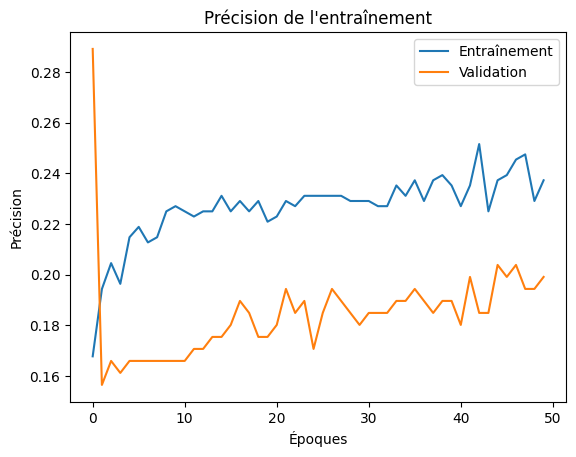

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


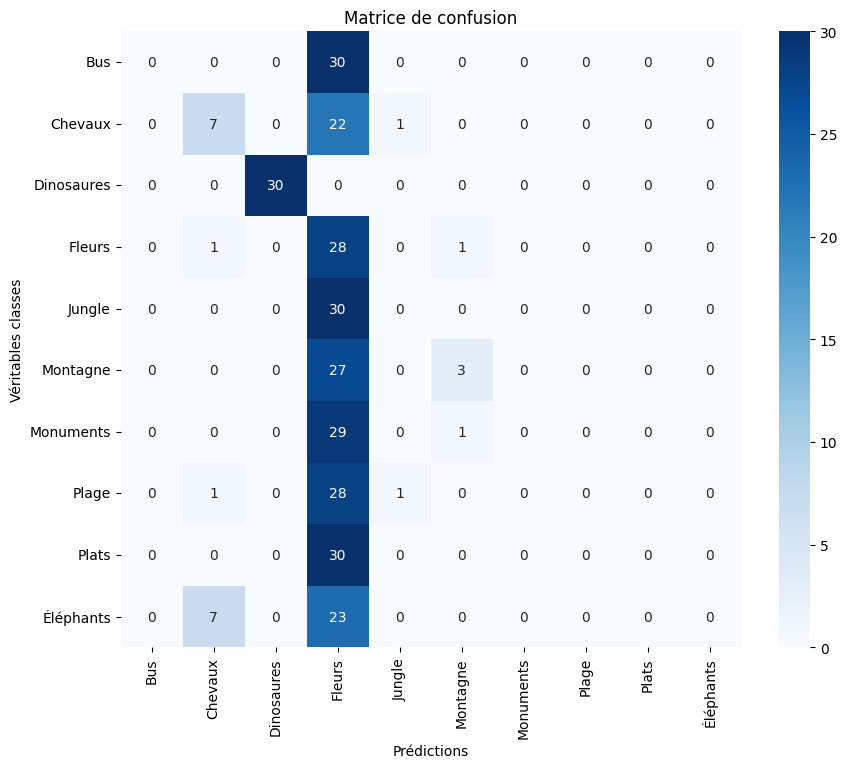

In [14]:
liste_descriptors = [jcd_sorted, phog_sorted, cedd_sorted, fcth_sorted, fuzzy_color_histogram_sorted]

for descriptor in liste_descriptors:
    train_and_evaluate_mlp(descriptors=descriptor, labels=labels, test_size=0.3, epochs=50, batch_size=32)

Ces résultats suggèrent que les descripteurs 1, 3 et 4 sont les plus à même d'aider à classifier les images.

Shape des labels one-hot encodés: (1000, 10)
Epoch 1/50


c:\Users\mathe\Save_OneDrive_CNAM\CNAM_3\Projet_1_Rouché_Sagard\projet_1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1099 - loss: 2.4432 - val_accuracy: 0.2227 - val_loss: 2.1541
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2904 - loss: 2.0429 - val_accuracy: 0.2986 - val_loss: 1.9662
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3490 - loss: 1.8232 - val_accuracy: 0.4171 - val_loss: 1.7918
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3892 - loss: 1.6867 - val_accuracy: 0.4360 - val_loss: 1.6599
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5090 - loss: 1.4307 - val_accuracy: 0.4739 - val_loss: 1.5459
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5336 - loss: 1.3293 - val_accuracy: 0.5024 - val_loss: 1.4475
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6005 - loss: 1.1326 - val_accuracy: 0.5118 - val_loss: 1.3798
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6349 - loss: 1.0931 - val_accuracy: 0.6019 - val_loss: 1.2938
Ep

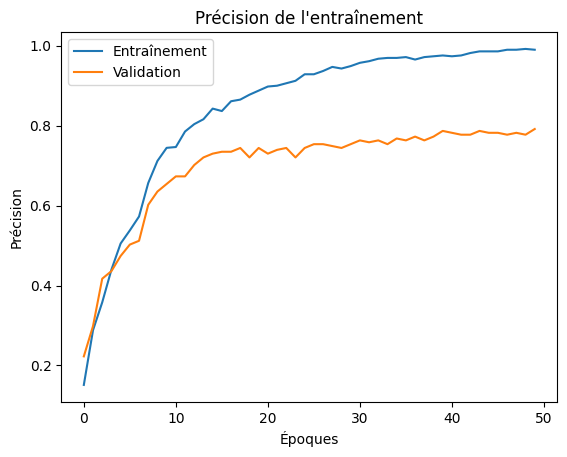

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


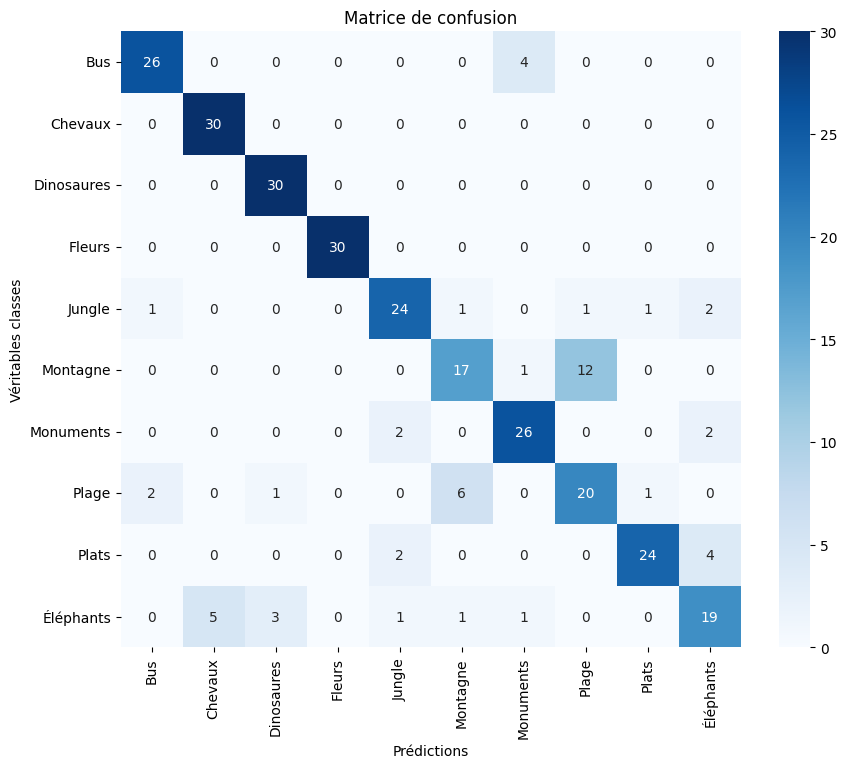

In [15]:
descriptors_efficace = pd.concat([jcd_sorted, cedd_sorted, fcth_sorted], axis=1)
train_and_evaluate_mlp(descriptors=descriptors_efficace, labels=labels, test_size=0.3, epochs=50, batch_size=32)